# House price prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("housing.csv")

In [6]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
data.replace(('yes', 'no'), (1, 0), inplace=True)
data.replace(('furnished','semi-furnished','unfurnished'), (2,1,0), inplace = True)

In [32]:

df_encoded = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['mainroad'] = encoder.fit_transform(data['mainroad'])
data['guestroom'] = encoder.fit_transform(data['guestroom'])
data['basement'] = encoder.fit_transform(data['basement'])
data['hotwaterheating'] = encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = encoder.fit_transform(data['airconditioning'])
data['prefarea'] = encoder.fit_transform(data['prefarea'])
data['furnishingstatus'] = encoder.fit_transform(data['furnishingstatus'])


In [34]:
x = data[['price','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = data.iloc[:,:1]

In [45]:
sns.pairplot(data)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x.shape
x.values.reshape(-1,1)

array([[13300000],
       [       4],
       [       2],
       ...,
       [       0],
       [       0],
       [       2]], dtype=int64)

In [37]:
x_train, x_test ,y_train, y_test = train_test_split(x , y , test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
lg = LinearRegression().fit(x_train, y_train)

In [40]:
y_pred = lg.predict(x_test)


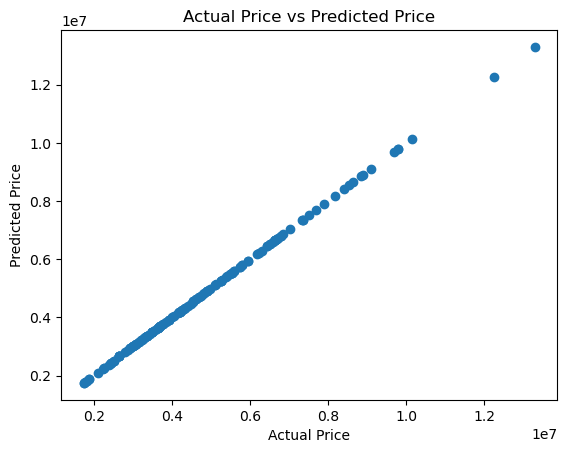

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()